[PCCP 모의고사 #2] 3번 - [카페 확장](https://school.programmers.co.kr/learn/courses/20848/lessons/255906)

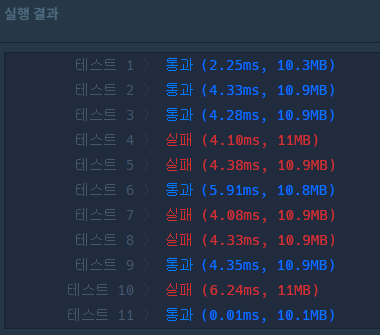

In [60]:
def solution(menu, order, k):
    answer = 0
    
    # check할 시간 리스트업
    in_times = [k*i for i in range(len(order))]
    out_times = []
    out_time = 0
    for o in order :
        out_time += menu[o]
        out_times.append(out_time)
    
    in_times.reverse(), out_times.reverse()
    
    num_people = 0
    next_in = in_times.pop()
    next_out = out_times.pop()

    while in_times or out_times:
        if next_out == next_in:
            next_in = in_times.pop() if in_times else next_in
            next_out = out_times.pop() if out_times else next_out
            continue
        elif next_out > next_in :
            num_people += 1
            if in_times:
                next_in = in_times.pop()
            else :
                next_out = out_times.pop()
                next_in = out_times[0] if out_times else next_out
        else :
            num_people -= 1
            if out_times:
                next_out = out_times.pop()
            else :
                next_in = in_times.pop()
                next_out = in_times[0] if in_times else next_in
        if num_people > answer:
            answer = num_people        
    
    return answer

- out time을 계산할 때, 들어온 시간과 이전 메뉴 제작 종료 시간 중 늦은 시간으로 지정하는 과정을 빠뜨림
- 코드를 수정하는 김에 조금 더 간단한 코드로 업데이트

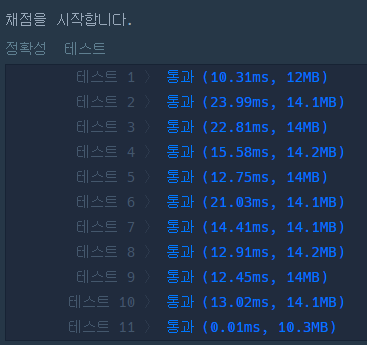

In [102]:
def solution(menu, order, k):
    events = []
    out_time = 0
    for i, o in enumerate(order):
        out_time = max(k*i, out_time) + menu[o]
        events.append([out_time, -1])
    events += [[i*k, +1] for i in range(len(order))]
    events = sorted(events, key=lambda x:(x[0], x[1]))
    answer = 0
    cnt_people = 0
    for (time, score) in events:
        cnt_people += score
        if cnt_people > answer:
            answer = cnt_people
    
    return answer

In [104]:
menu = [5, 12, 30]
order = [1,2,0,1]
k = 10
solution(menu, order, k)

[[0, 1], [10, 1], [12, -1], [20, 1], [30, 1], [42, -1], [47, -1], [59, -1]]


3

In [105]:
menu = [5, 12, 30]
order = [2, 1, 0, 0, 0, 1, 0]
k = 10
solution(menu, order, k)

[[0, 1], [10, 1], [20, 1], [30, -1], [30, 1], [40, 1], [42, -1], [47, -1], [50, 1], [52, -1], [57, -1], [60, 1], [69, -1], [74, -1]]


4

In [106]:
menu = [5]
order = [0, 0, 0, 0, 0]
k = 5
solution(menu, order, k)

[[0, 1], [5, -1], [5, 1], [10, -1], [10, 1], [15, -1], [15, 1], [20, -1], [20, 1], [25, -1]]


1

[PCCP 모의고사 #2] 4번 - [보물 지도](https://school.programmers.co.kr/learn/courses/20848/lessons/255907)

In [6]:
visited = {(1,1,0):3}
visited.get((1,1,0))

3

In [9]:
visited.get((1,1,0), float('inf'))

3

In [8]:
visited.get((1,1,1), float('inf'))

inf

- 기본적인 DFS를 적용해 구현  
: 테스트 케이스에서 런타임 에러 발생

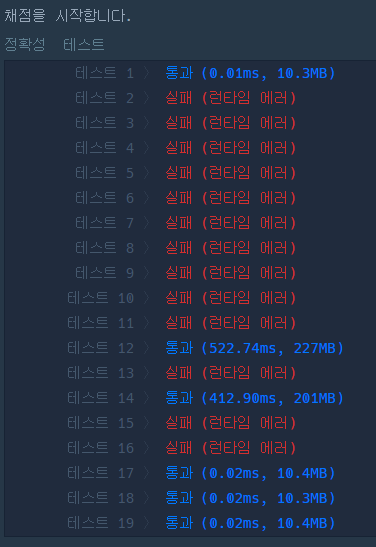

- BFS를 이용해서 탐색하는 코드로 수정

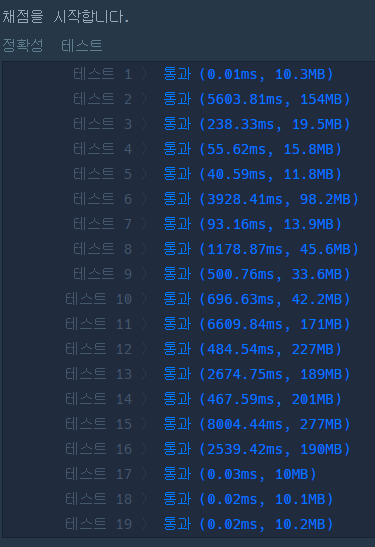

In [10]:
from collections import deque

def solution(n, m, hole):
    holes = {(x, y) for x, y in hole}  # 함정 위치를 셋으로 변환하여 탐색 속도 개선
    visited = set()  # 방문한 위치와 신발 사용 여부를 저장하는 셋
    queue = deque([(1, 1, False, 0)])  # 시작 위치, 신발 사용 여부, 이동 시간을 큐에 추가
    
    while queue:
        x, y, used_shoes, time = queue.popleft()
        if (x, y) == (n, m):  # 목적지에 도달했다면 현재 시간을 반환
            return time
        if (x, y, used_shoes) in visited:  # 이미 방문한 상태라면 스킵
            continue
        visited.add((x, y, used_shoes))  # 현재 상태를 방문 처리
        
        for dx, dy in [(1, 0), (0, 1), (-1, 0), (0, -1)]:  # 상, 하, 좌, 우 이동
            for step in [1, 2] if not used_shoes else [1]:  # 신발을 사용하지 않았다면 2칸 이동 가능
                nx, ny = x + dx*step, y + dy*step
                if 1 <= nx <= n and 1 <= ny <= m:  # 지도 범위 내
                    if (nx, ny) in holes:  # 함정이고 한 칸 이동이라면 이동 불가
                        continue
                    queue.append((nx, ny, used_shoes or step == 2, time + 1))

    return -1  # 목적지에 도달할 수 없는 경우

In [11]:
n = 4
m = 4
hole = [[2, 3], [3, 3]]
solution(n, m, hole)

5